In [2]:
!pip install pandasql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=3379b64843b98a7ae9ee6c3c01caa683cd6ab0bc1cca13ff95e15a632a71331e
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [7]:
data = pd.read_csv('ecommerce_transactions.csv')

In [8]:
data.head(5)

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [11]:
data.describe()

,Transaction_ID,Age,Purchase_Amount
count,50000.000000,50000.000000,50000.000000
mean,25000.500000,43.968680,503.159793
std,14433.901067,15.260578,286.563558
min,1.000000,18.000000,5.040000
25%,12500.750000,31.000000,255.450000
50%,25000.500000,44.000000,503.110000
75%,37500.250000,57.000000,751.162500
max,50000.000000,70.000000,999.980000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB


In [13]:
check_duplicate = data.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 0


In [14]:
data.isna().sum()

,0
Transaction_ID,0
User_Name,0
Age,0
Country,0
Product_Category,0
Purchase_Amount,0
Payment_Method,0
Transaction_Date,0


###Distribusi Penjualan per Kategori Produk
**Tujuan**: Mengidentifikasi kategori produk yang menghasilkan pendapatan tertinggi untuk memahami produk terlaris.  
**Query SQL**: Mengelompokkan data berdasarkan `Product_Category` untuk menghitung total pendapatan dan jumlah transaksi.

Top 5 Kategori Produk Berdasarkan Pendapatan:
  Product_Category  TotalRevenue  TotalTransactions
0           Sports    3195335.90               6312
1             Toys    3185652.36               6392
2            Books    3181897.30               6253
3         Clothing    3171225.96               6224
4      Electronics    3133965.04               6320


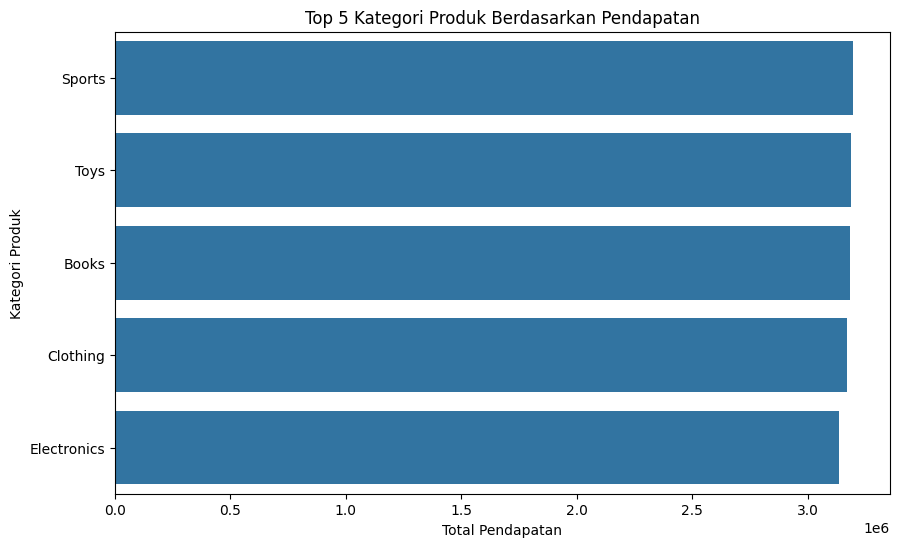

In [25]:
pysqldf = lambda q: sqldf(q, globals())
query = """
SELECT Product_Category, SUM(Purchase_Amount) as TotalRevenue, COUNT(Transaction_ID) as TotalTransactions
FROM data
GROUP BY Product_Category
ORDER BY TotalRevenue DESC
LIMIT 5
"""
top_categories = pysqldf(query)
print("Top 5 Kategori Produk Berdasarkan Pendapatan:")
print(top_categories)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalRevenue', y='Product_Category', data=top_categories)
plt.title('Top 5 Kategori Produk Berdasarkan Pendapatan')
plt.xlabel('Total Pendapatan')
plt.ylabel('Kategori Produk')
plt.show()

**Insight**: Kategori produk dengan pendapatan tertinggi menunjukkan fokus bisnis yang kuat. Kategori ini dapat diprioritaskan untuk promosi atau stok tambahan.


### Distribusi Metode Pembayaran
**Tujuan**: Memahami metode pembayaran yang paling populer di kalangan pelanggan untuk strategi pemasaran atau optimalisasi pembayaran.  
**Query SQL**: Menghitung jumlah transaksi per metode pembayaran.

Distribusi Metode Pembayaran:
     Payment_Method  TransactionCount
0               UPI              8477
1  Cash on Delivery              8434
2        Debit Card              8355
3       Credit Card              8310
4            PayPal              8250
5       Net Banking              8174


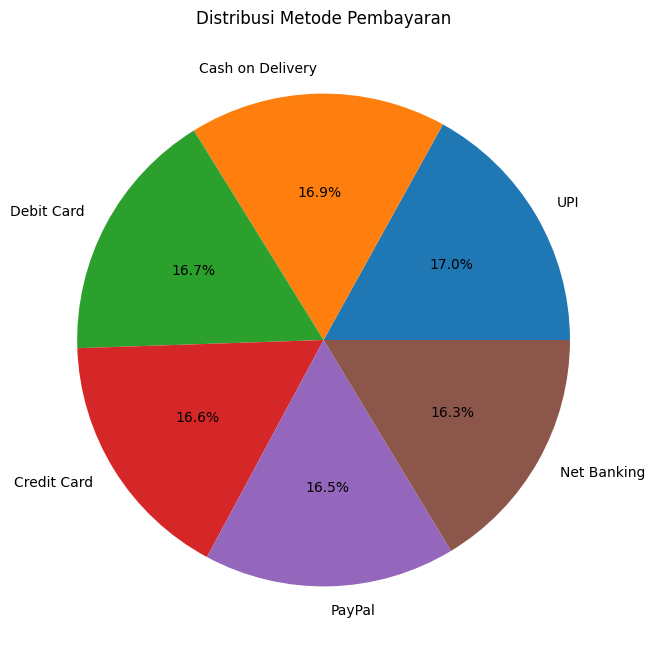

In [20]:
query = """
SELECT Payment_Method, COUNT(Transaction_ID) as TransactionCount
FROM data
GROUP BY Payment_Method
ORDER BY TransactionCount DESC
"""
payment_methods = pysqldf(query)
print("Distribusi Metode Pembayaran:")
print(payment_methods)

# Visualisasi
plt.figure(figsize=(8, 8))
plt.pie(payment_methods['TransactionCount'], labels=payment_methods['Payment_Method'], autopct='%1.1f%%')
plt.title('Distribusi Metode Pembayaran')
plt.show()

**Insight**: Metode pembayaran yang dominan (misalnya, e-wallet) dapat menjadi fokus untuk promosi seperti cashback atau integrasi pembayaran baru.

### Tren Penjualan Bulanan
**Tujuan**: Mengidentifikasi pola Belanja, seperti lonjakan penjualan saat bulan tertentu, untuk rekomendasi waktu promosi.  
**Query SQL**: Mengelompokkan data berdasarkan `Transaction_Date` untuk menghitung total pendapatan dan jumlah transaksi.

Penjualan Bulanan di 2024:
      Month  TotalRevenue  TotalTransactions
0   2024-01    1101023.49               2190
1   2024-02    1004235.75               1992
2   2024-03    1018957.55               2041
3   2024-04    1047109.76               2067
4   2024-05    1070447.76               2142
5   2024-06    1032452.78               2023
6   2024-07    1065266.58               2092
7   2024-08    1061115.60               2093
8   2024-09    1034725.55               2037
9   2024-10    1079380.33               2144
10  2024-11    1065021.09               2113
11  2024-12    1061061.79               2105


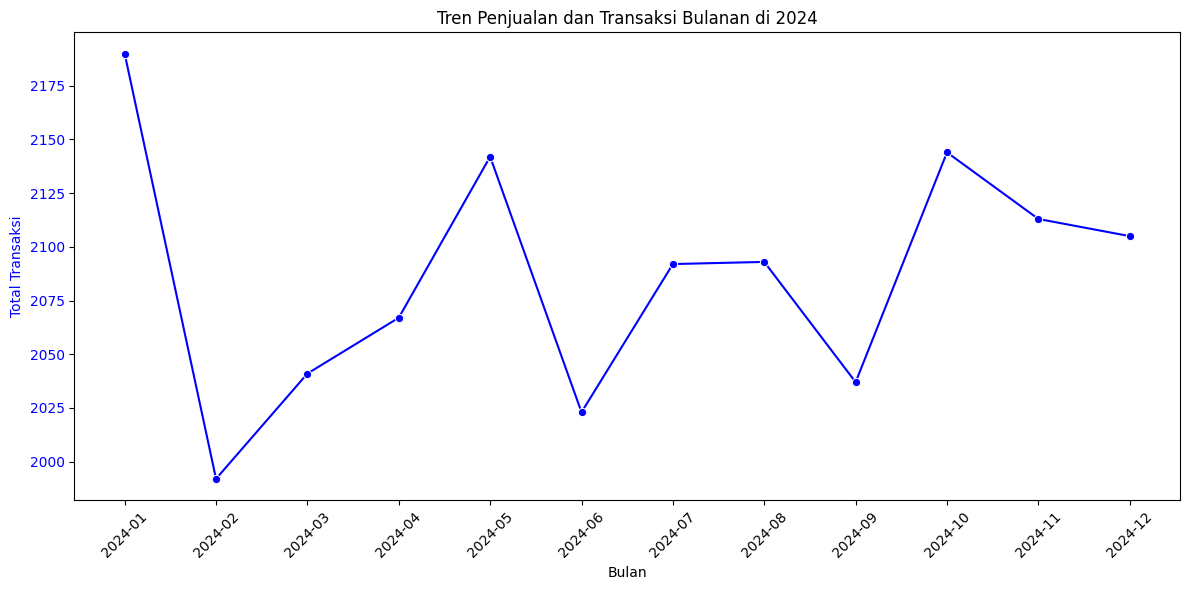

In [39]:
query = """
SELECT strftime('%Y-%m', Transaction_Date) as Month,
       SUM(Purchase_Amount) as TotalRevenue,
       COUNT(Transaction_ID) as TotalTransactions
FROM data
WHERE strftime('%Y', Transaction_Date) = '2024'
GROUP BY strftime('%Y-%m', Transaction_Date)
ORDER BY Month
"""
monthly_sales_2024 = pysqldf(query)
print("Penjualan Bulanan di 2024:")
print(monthly_sales_2024)

# Visualisasi dual-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot TotalTransactions (kiri Y-axis)
sns.lineplot(x='Month', y='TotalTransactions', data=monthly_sales_2024, marker='o', color='blue', ax=ax1)
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Total Transaksi', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(monthly_sales_2024['Month'])))
ax1.set_xticklabels(monthly_sales_2024['Month'], rotation=45)

plt.title('Tren Penjualan dan Transaksi Bulanan di 2024')
plt.tight_layout()
plt.show()

**Insight**: Dari grafik, terlihat bahwa penjualan dan transaksi bulanan di 2024 mengalami fluktuasi signifikan, dengan puncak pada Januari, Mei, dan Oktober, serta penurunan tajam setelah puncak tersebut. Ini menunjukkan adanya pola musiman

### Hubungan Usia dan Pembelian
**Tujuan**: Memahami bagaimana usia pelanggan memengaruhi pembelian untuk segmentasi pelanggan.  
**Query SQL**: Menghitung rata-rata dan total pembelian per kelompok usia.

Rata-rata dan Total Pembelian per Usia:
    Age  AvgPurchase  TotalPurchase
0    59   523.200951      516922.54
1    41   511.023701      509490.63
2    34   514.750815      505485.30
3    42   524.489601      499838.59
4    27   515.225901      497708.22
5    45   508.666479      496967.15
6    33   496.609316      493629.66
7    38   513.535805      490940.23
8    19   512.264092      488187.68
9    36   505.745493      487032.91
10   20   504.196224      486045.16
11   43   486.259379      485773.12
12   48   512.406579      485249.03
13   61   502.898475      484794.13
14   26   516.748759      483160.09
15   51   516.222918      481119.76
16   37   509.278441      480249.57
17   52   509.027149      478485.52
18   60   498.897404      478442.61
19   32   516.043495      478372.32
20   46   492.394367      478114.93
21   22   508.601809      478085.70
22   23   504.720908      477970.70
23   28   502.387855      477770.85
24   50   501.820746      477733.35
25   40   507.776766    

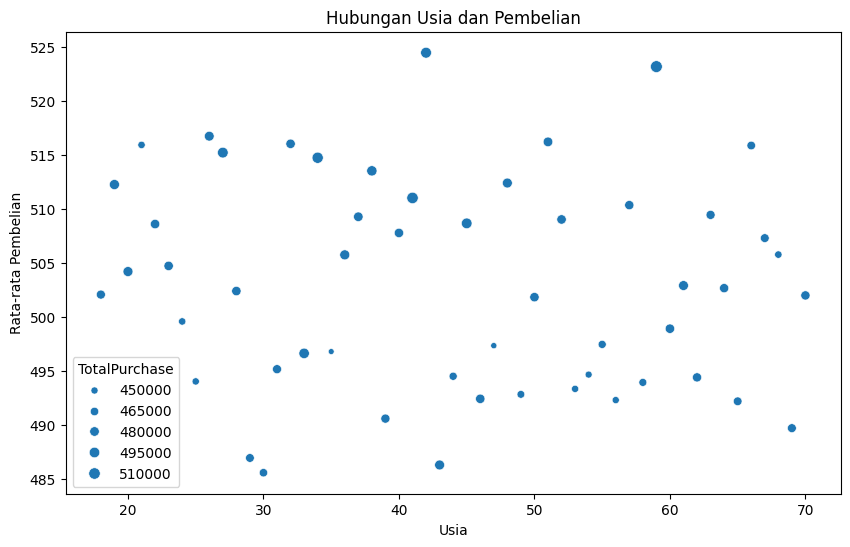

In [41]:
query = """
SELECT Age, AVG(Purchase_Amount) as AvgPurchase, SUM(Purchase_Amount) as TotalPurchase
FROM data
GROUP BY Age
ORDER BY TotalPurchase DESC
"""
age_purchases = pysqldf(query)
print("Rata-rata dan Total Pembelian per Usia:")
print(age_purchases)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='AvgPurchase', size='TotalPurchase', data=age_purchases)
plt.title('Hubungan Usia dan Pembelian')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Pembelian')
plt.show()

**Insight**: Kelompok usia dengan pembelian tertinggi dapat menjadi target utama untuk kampanye pemasaran yang dipersonalisasi.

### Analisis per Negara
**Tujuan**: Mengidentifikasi negara dengan penjualan tertinggi untuk strategi ekspansi atau fokus pasar.  
**Query SQL**: Mengelompokkan data berdasarkan `Country`

Top 10 Negara Berdasarkan Pendapatan:
     Country  TotalTransactions  UniqueCustomers
0     Canada               5082              100
1     Mexico               5059              100
2    Germany               5047              100
3      India               4996              100
4     France               4993              100
5  Australia               4985              100
6        USA               4979              100
7      Japan               4960              100
8         UK               4951              100
9     Brazil               4948              100


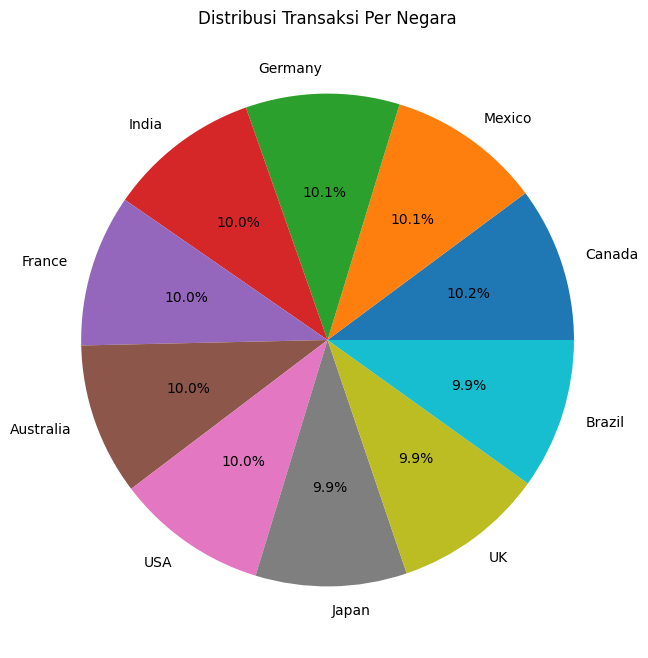

In [49]:
query = """
SELECT Country, COUNT(Transaction_ID) as TotalTransactions, COUNT(DISTINCT User_Name) as UniqueCustomers
FROM data
GROUP BY Country
ORDER BY TotalTransactions DESC
LIMIT 10
"""
country_sales = pysqldf(query)
print("Top 10 Negara Berdasarkan Pendapatan:")
print(country_sales)

# Visualisasi
plt.figure(figsize=(8, 8))
plt.pie(country_sales['TotalTransactions'], labels=country_sales['Country'], autopct='%1.1f%%')
plt.title('Distribusi Transaksi Per Negara')
plt.show()

**Insight**: Negara dengan pendapatan tertinggi menunjukkan pasar potensial

### Analisis Diskon (Harga Rendah vs. Transaksi)
**Tujuan**: Menganalisis apakah harga rendah (indikasi diskon) menghasilkan lebih banyak transaksi.  
**Query SQL**: Membandingkan kategori dengan harga di bawah rata-rata dengan jumlah transaksi.

Kategori dengan Harga Rata-rata Rendah dan Jumlah Transaksi:
  Product_Category    AvgPrice  TransactionCount
0             Toys  498.381158              6392
1      Electronics  495.880544              6320
2          Grocery  502.587212              6215
3   Home & Kitchen  500.716022              6209


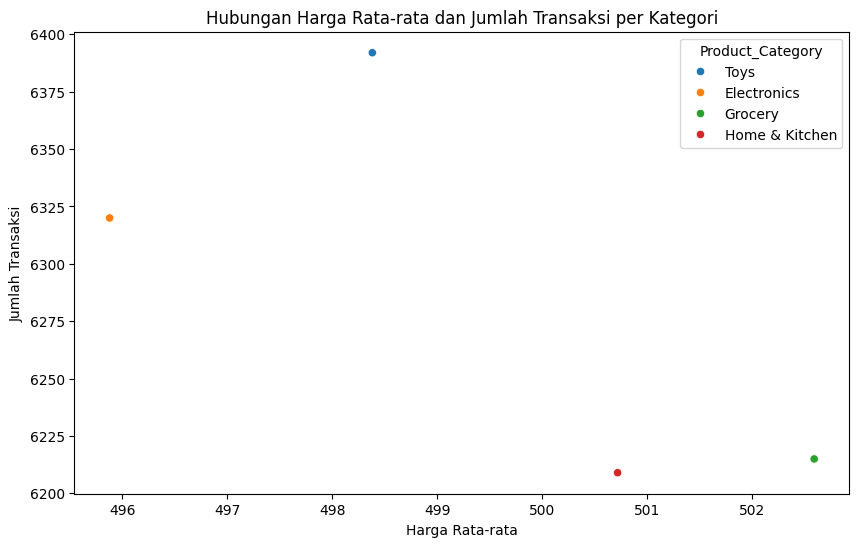

In [51]:
query = """
SELECT Product_Category, AVG(Purchase_Amount) as AvgPrice, COUNT(Transaction_ID) as TransactionCount
FROM data
GROUP BY Product_Category
HAVING AvgPrice < (SELECT AVG(Purchase_Amount) FROM data)
ORDER BY TransactionCount DESC
"""
discount_effect = pysqldf(query)
print("Kategori dengan Harga Rata-rata Rendah dan Jumlah Transaksi:")
print(discount_effect)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AvgPrice', y='TransactionCount', hue='Product_Category', data=discount_effect)
plt.title('Hubungan Harga Rata-rata dan Jumlah Transaksi per Kategori')
plt.xlabel('Harga Rata-rata')
plt.ylabel('Jumlah Transaksi')
plt.show()

**Insight**: Kategori dengan harga rendah cenderung memiliki lebih banyak transaksi, menunjukkan potensi strategi diskon untuk meningkatkan penjualan.

Berdasarkan analisis:
- **Kategori Terlaris**: Kategori seperti [Sport] menyumbang pendapatan terbesar, menunjukkan fokus utama bisnis.
- **Pola Musiman**: Lonjakan penjualan dan transaksi bulanan di 2024 mengalami fluktuasi signifikan, dengan puncak pada Januari, Mei, dan Oktober, serta penurunan tajam setelah puncak tersebut. Ini menunjukkan adanya pola musiman.
- **Metode Pembayaran**: [Distribusi Metode Pembayaran
Tren Penjualan Bulanan] menunjukkan preferensi pelanggan, seperti e-wallet, yang dapat dioptimalkan.
- **Segmen Usia**: Kelompok usia [59] adalah pembeli terbesar, cocok untuk kampanye targeted.
- **Pasar Utama**: Negara seperti [Jerman dan Meksiko] adalah pasar terbesar, menunjukkan peluang ekspansi.
- **Strategi Diskon**: Kategori dengan harga rendah, seperti Toys, mencatatkan jumlah transaksi yang lebih tinggi. Oleh karena itu, menerapkan diskon pada bulan-bulan dengan penjualan rendah dapat menjadi strategi efektif untuk meningkatkan pendapatan perusahaan.